<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

This appears to be the final project, the hello world for machine learning i.e. Boston Housing Dataset, and it is not a guided one so I have no option but to do it completely myself, with some help from google of course. I did not invent this programming language or the libraries.

The stuff to do is already listed above

Given: imports, challenge setups

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
# %pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 50.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
print(data.shape)
print(data.columns)
print(data.isna().values.any())
print(data.duplicated().values.any())

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')
False
False


Okay no NaN and no Duplicates, this is a good sign, no cleaning needed. Let's also see the head and tail of the data

In [ ]:
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  PRICE  
0   4.98  24.00  
1   9.14  21.60  
2   4.03  34.70  
3   2.94  33.40  
4   5.33  36.20  
     CRIM   ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
501  0.06 0.00  11.93  0.00 0.57 6.59 69.10 2.48 1.00 273.00    21.00 391.99   
502  0.05 0.00  11.93  0.00 0.57 6.12 76.70 2.29 1.00 273.00    21.00 396.90   
503  0.06 0.00  11.93  0.00 0.57 6.98 91.00 2.17 1.00 273.00    21.00 396.90   
504  0.11 0.00  11.93  0.00 0.57 6.79 89.30 2.39 1.00 273.00    21.00 393.45   
505  0.05 0.00  1

## Descriptive Statistics

**Challenge**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [ ]:
print(f"Number of students per teacher on average: {data.PTRATIO.mean():.3f}")
print(f"Average home price: {data.PRICE.mean():.3f}")

Number of students per teacher on average: 18.456
Average home price: 22.533


CHAS, as described above, is an indicator of whether the Charles River is nearby. From the description, we can see that the min and max values are 0 and 1, and they are the only permissible values. Let's see a value counts to verify:

In [ ]:
data.CHAS.value_counts()

,count
CHAS,
0.00,471
1.00,35


In [ ]:
print(f'Max rooms per dwelling: {data.RM.max()}')
print(f'Min rooms per dwelling: {data.RM.min()}')

Max rooms per dwelling: 8.78
Min rooms per dwelling: 3.561


## Visualise the Features

**Challenge**: Having looked at some descriptive statistics, visualise the data for your model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.

Try setting the `aspect` parameter to `2` for a better picture.

What do you notice in the distributions of the data?

#### House Prices 💰

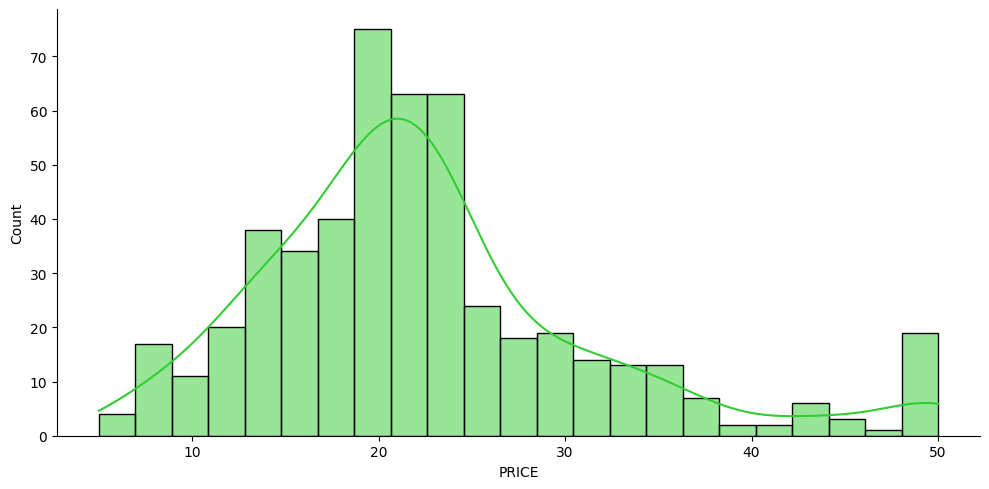

In [198]:
sns.displot(data, x= 'PRICE', kde=True, aspect=2, color = '#32CD32')

Course solution:
```
sns.displot(data['PRICE'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()
```
Differences: I didn't care about color, labels or the title


#### Distance to Employment - Length of Commute 🚗

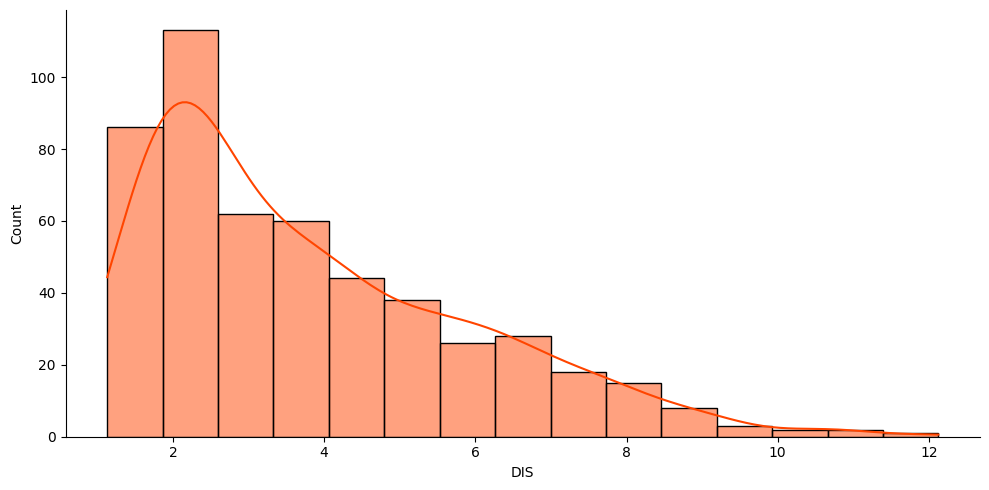

In [197]:
sns.displot(data, x= 'DIS', kde=True, aspect=2, color = '#FF4500')

#### Number of Rooms

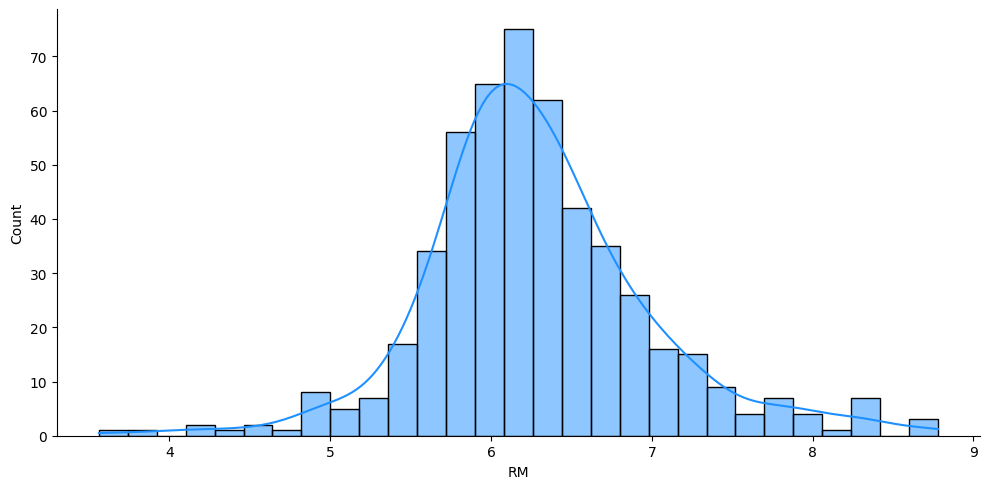

In [196]:
sns.displot(data, x= 'RM', kde=True, aspect=2, color = '#1E90FF')

#### Access to Highways 🛣

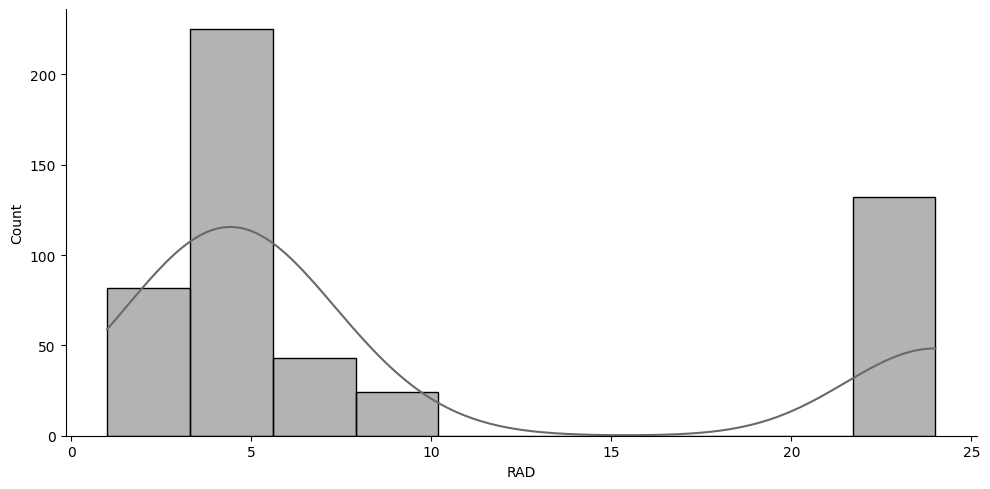

In [195]:
sns.displot(data, x= 'RAD', kde=True, aspect=2, color = '#696969')

These displots were just copy pastes after the first one, pretty informative though.
1. House prices: Most houses around 20k-ish range, extends from 10-50k
2. Most houses seem relatively close to the employment centres, though there are some with over 10 units weighted distance
3. The number of rooms shows a normal distribution, centred at around 6 rooms per dwelling
4. Most homes have a good accessibility to highways. Though, some homes are on the other end, totally isolated. This suggests there's not many homes that offer a balalnce of peace and accessibility.

#### Next to the River? ⛵️

**Challenge**

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png height=350>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [ ]:
near_river = px.bar(data, x= ['No', 'Yes'], y = data.CHAS.value_counts().values,
       color= [0, 1], color_continuous_scale= 'Sunset',
                    title= 'Next to Charles River?')
near_river.update_layout(xaxis_title='Property Located Next to the River?', yaxis_title='Number of houses',
                         coloraxis_showscale= False)

My inabiliity to remember the attribute name for axis labels costed me a lot of time here.

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

**Challenge**

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`.

Okay let's make an assumption before moving forward:
1. NOX and DIS: more population means less distance to employment, employment centres create pollution I'd think
2. RM and PRICE: direct relation, more rooms must equal higher price
3. LSTAT and price: If people are poorer, it means they bought the houses in cheap, so price must be lower

Okay, I was told to visualize ALL the relationships at the same time

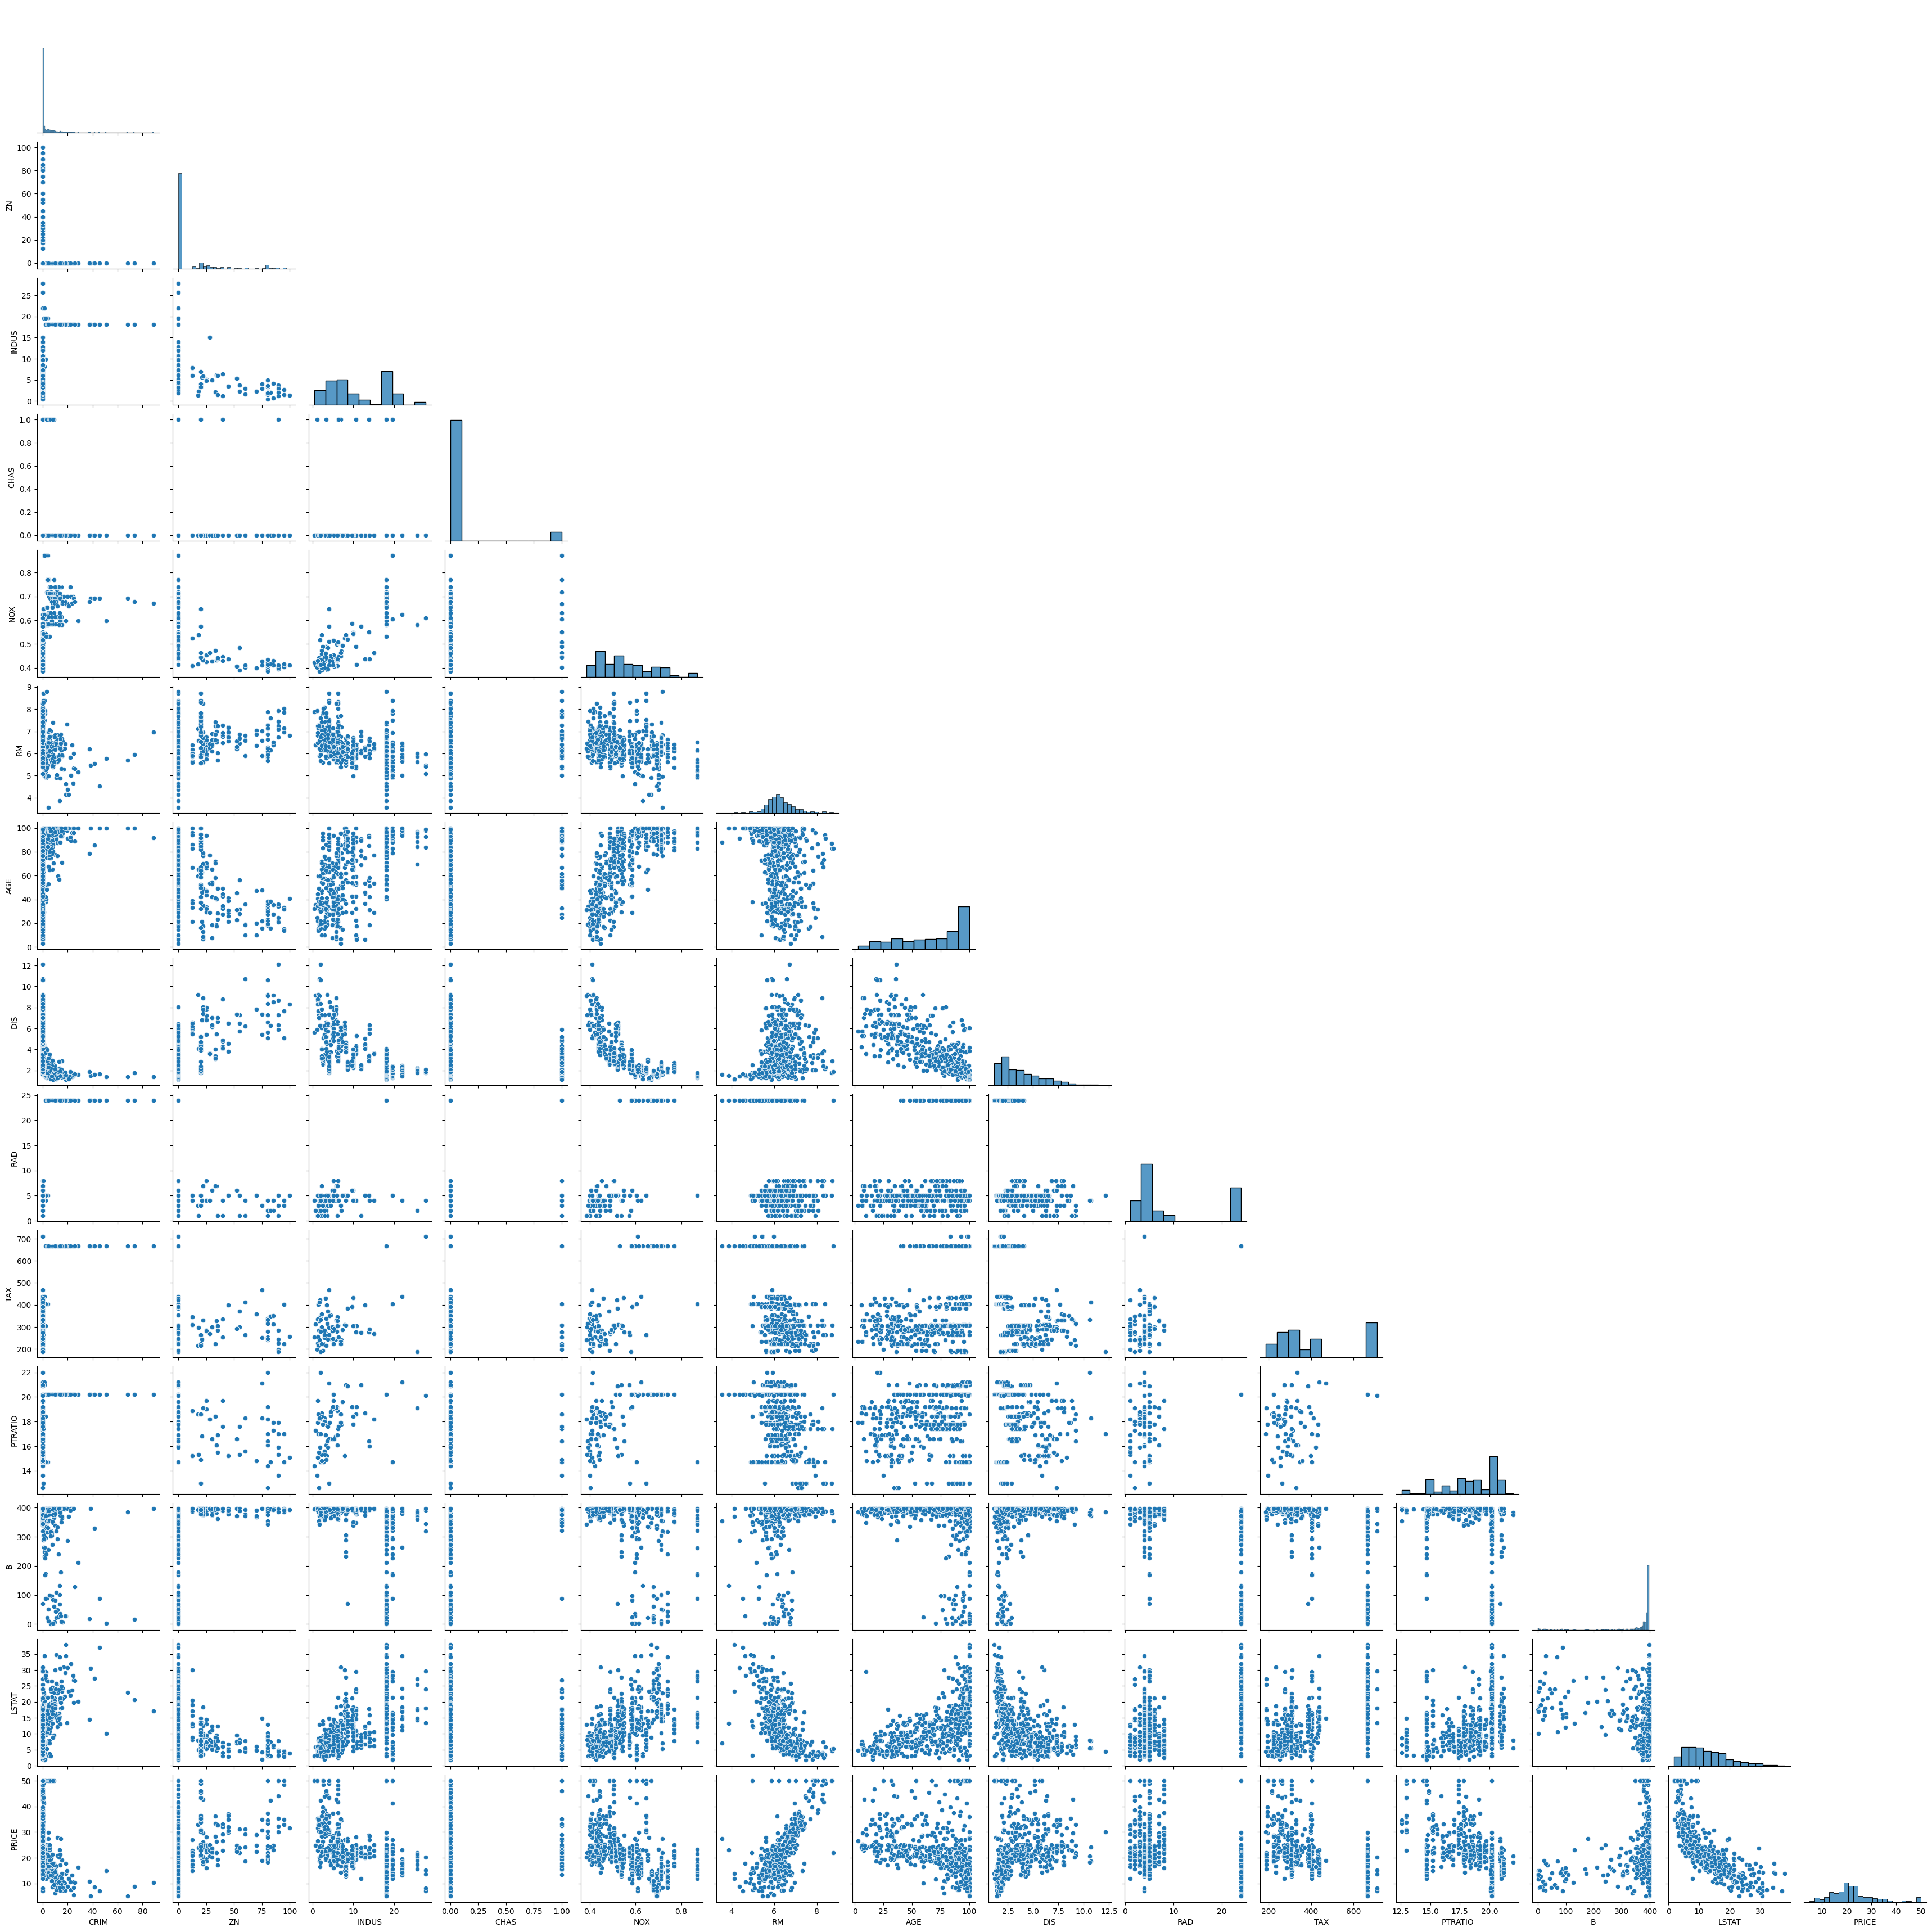

In [ ]:
sns.pairplot(data, x_vars=data.columns , y_vars=data.columns, corner=True)

Course solution was just sns.pairplot(data)

I didn't want all the options. Why have Y vs X when you already have X vs Y

This is wild to say the least but I gave into my intrusive thoughts for this one. Observed from the plots:
1. NOX vs DIS : inverse trend, as expected
2. RM vs PRICE: There are some high priced homes at all values of RM, but mostly the trend is upward
3. LSTAT vs PRICE: Downward trend as expected, the more the poor people, the lesser the house price.

**Challenge**

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Try adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

#### Distance from Employment vs. Pollution

**Challenge**:

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases?

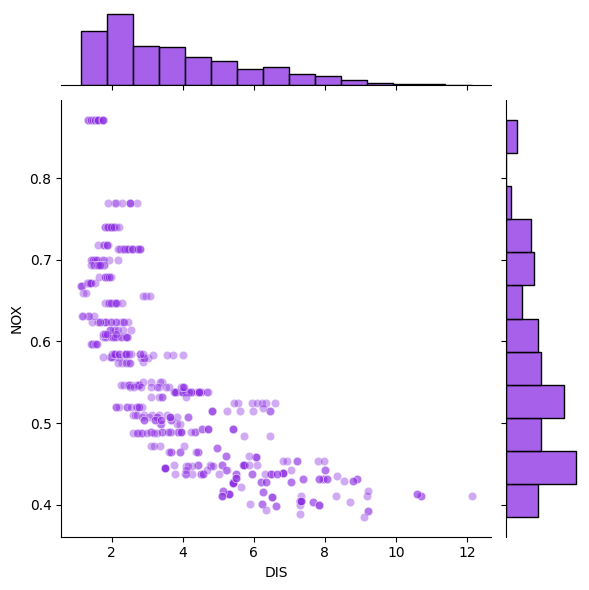

In [199]:
sns.jointplot(data, x= 'DIS', y= 'NOX', joint_kws={'alpha': 0.4}, color = '#8A2BE2')

Course solution:
```
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['DIS'],
                y=data['NOX'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()
```
Differences: I didn't care about aesthetics, or use a grid. I forgot, honestly.

Also, all her plots are different color, while I didn't think of that at all. Maybe I should change it? Heck yeah I will.

As distance increases, the population seems to have gone down

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

**Challenge**:

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

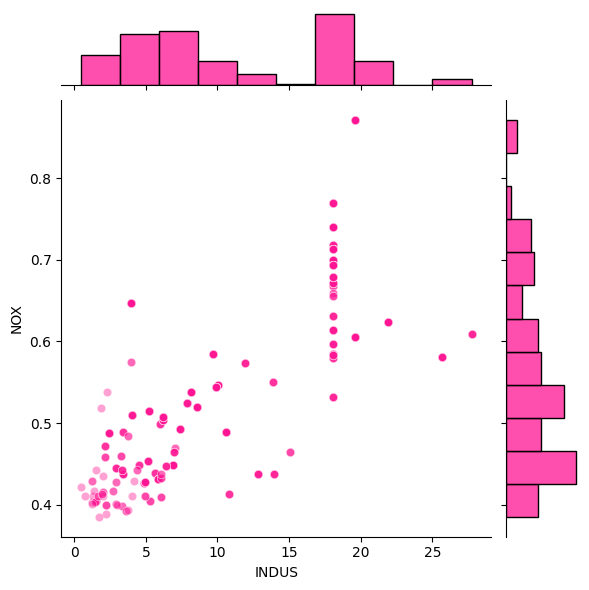

In [200]:
sns.jointplot(data, x= 'INDUS', y= 'NOX', joint_kws={'alpha': 0.4}, color = '#FF1493')

The NOX value for the same INDUS value varies from 0.55-0.75 at between 15-20 INDUS., but apart from that, the graph has a positive slope.

#### % of Lower Income Population vs Average Number of Rooms

**Challenge**

Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

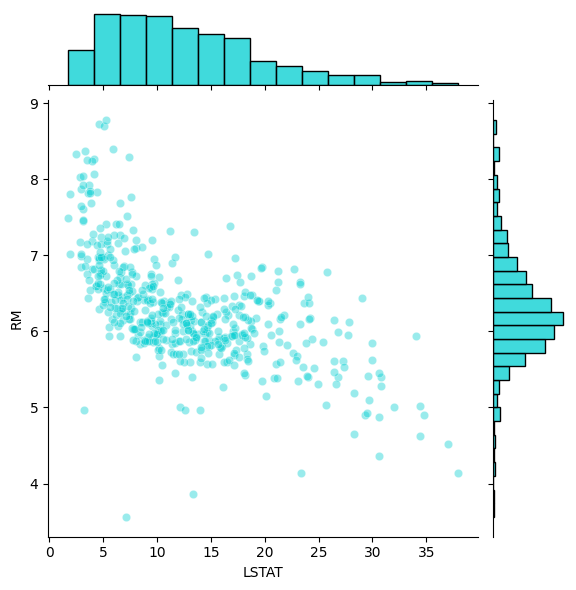

In [201]:
sns.jointplot(data, x= 'LSTAT', y= 'RM', joint_kws={'alpha': 0.4}, color = '#00CED1')

This chart has a clear downward trend, showing that more rooms in the house means there are less poor people in the area.

#### % of Lower Income Population versus Home Price

**Challenge**

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

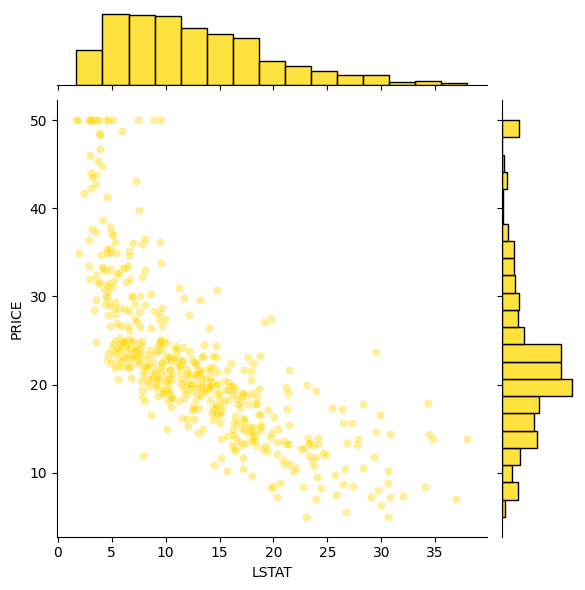

In [202]:
sns.jointplot(data, x= 'LSTAT', y= 'PRICE', joint_kws={'alpha': 0.4}, color = '#FFD700')

Another clear downward trend. The more the LSTAT, the less the prices for the house

#### Number of Rooms versus Home Value

**Challenge**

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊

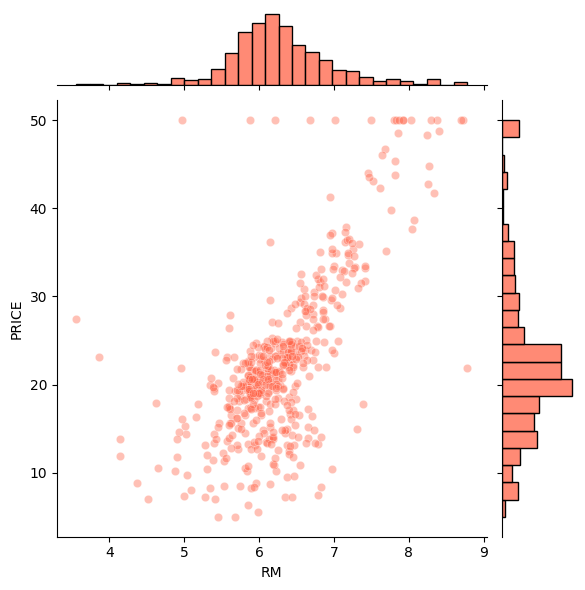

In [203]:
sns.jointplot(data, x= 'RM', y= 'PRICE', joint_kws={'alpha': 0.4}, color = '#FF6347')

More rooms = More price. Simple

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.

**Challenge**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20.
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning.


Hint: Remember, your **target** is your home PRICE, and your **features** are all the other columns you'll use to predict the price.


In [118]:
X = data[data.columns[:-1]]
y = data['PRICE']
# We want to predict y using all features of X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

Course solution used data.drop instead

And it had the following code:
```
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')
```

# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

**Challenge**

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [158]:
reg = LinearRegression().fit(X= X_train, y= y_train)
reg.score(X_train, y_train)

0.750121534530608

So the R2 value is 0.75, which is not bad but not optimal for our prediction model

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

**Challenge** Print out the coefficients (the thetas in the equation above) for the features. Hint: You'll see a nice table if you stick the coefficients in a DataFrame.

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?

In [120]:
pd.DataFrame(np.concatenate((np.array([reg.intercept_]), reg.coef_)))

,0
0,36.53
1,-0.13
2,0.06
3,-0.01
4,1.97
5,-16.27
6,3.11
7,0.02
8,-1.48
9,0.30


Course solution:
```
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef
```

Even this table took some debugging, just because I wanted all the parameters here, including the intercept and the other coefficients.

The last (LSTAT) coefficient is negative, which means the model predicts a negative relation between LSTAT values and PRICE, which is as we saw in the plot. All others, like CHAS, NOX, RM, etc also show expected values.

Some features did not contribute to the price much, like INDUS, AGE, TAX, B. Guess people don't care whether there's businesses nearby, or how old the homes are, or how much tax they'd have to pay, or how many black people are in the neighborhood, at least in Boston.

The coefficient for RM is 3.11, which translates to a house with one more room being about $3110 more expensive.

### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

**Challenge**: Create two scatter plots.

The first plot should be actual values (`y_train`) against the predicted value values:

<img src=https://i.imgur.com/YMttBNV.png height=350>

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for:

<img src=https://i.imgur.com/HphsBsj.png height=350>



In [121]:
predicted_values = reg.predict(X_train)

[Text(0.5, 1.0, 'Actual vs Predicted Prices'),
 Text(0.5, 0, 'Actual Prices in k$'),
 Text(0, 0.5, 'Predicted Prices in k$')]

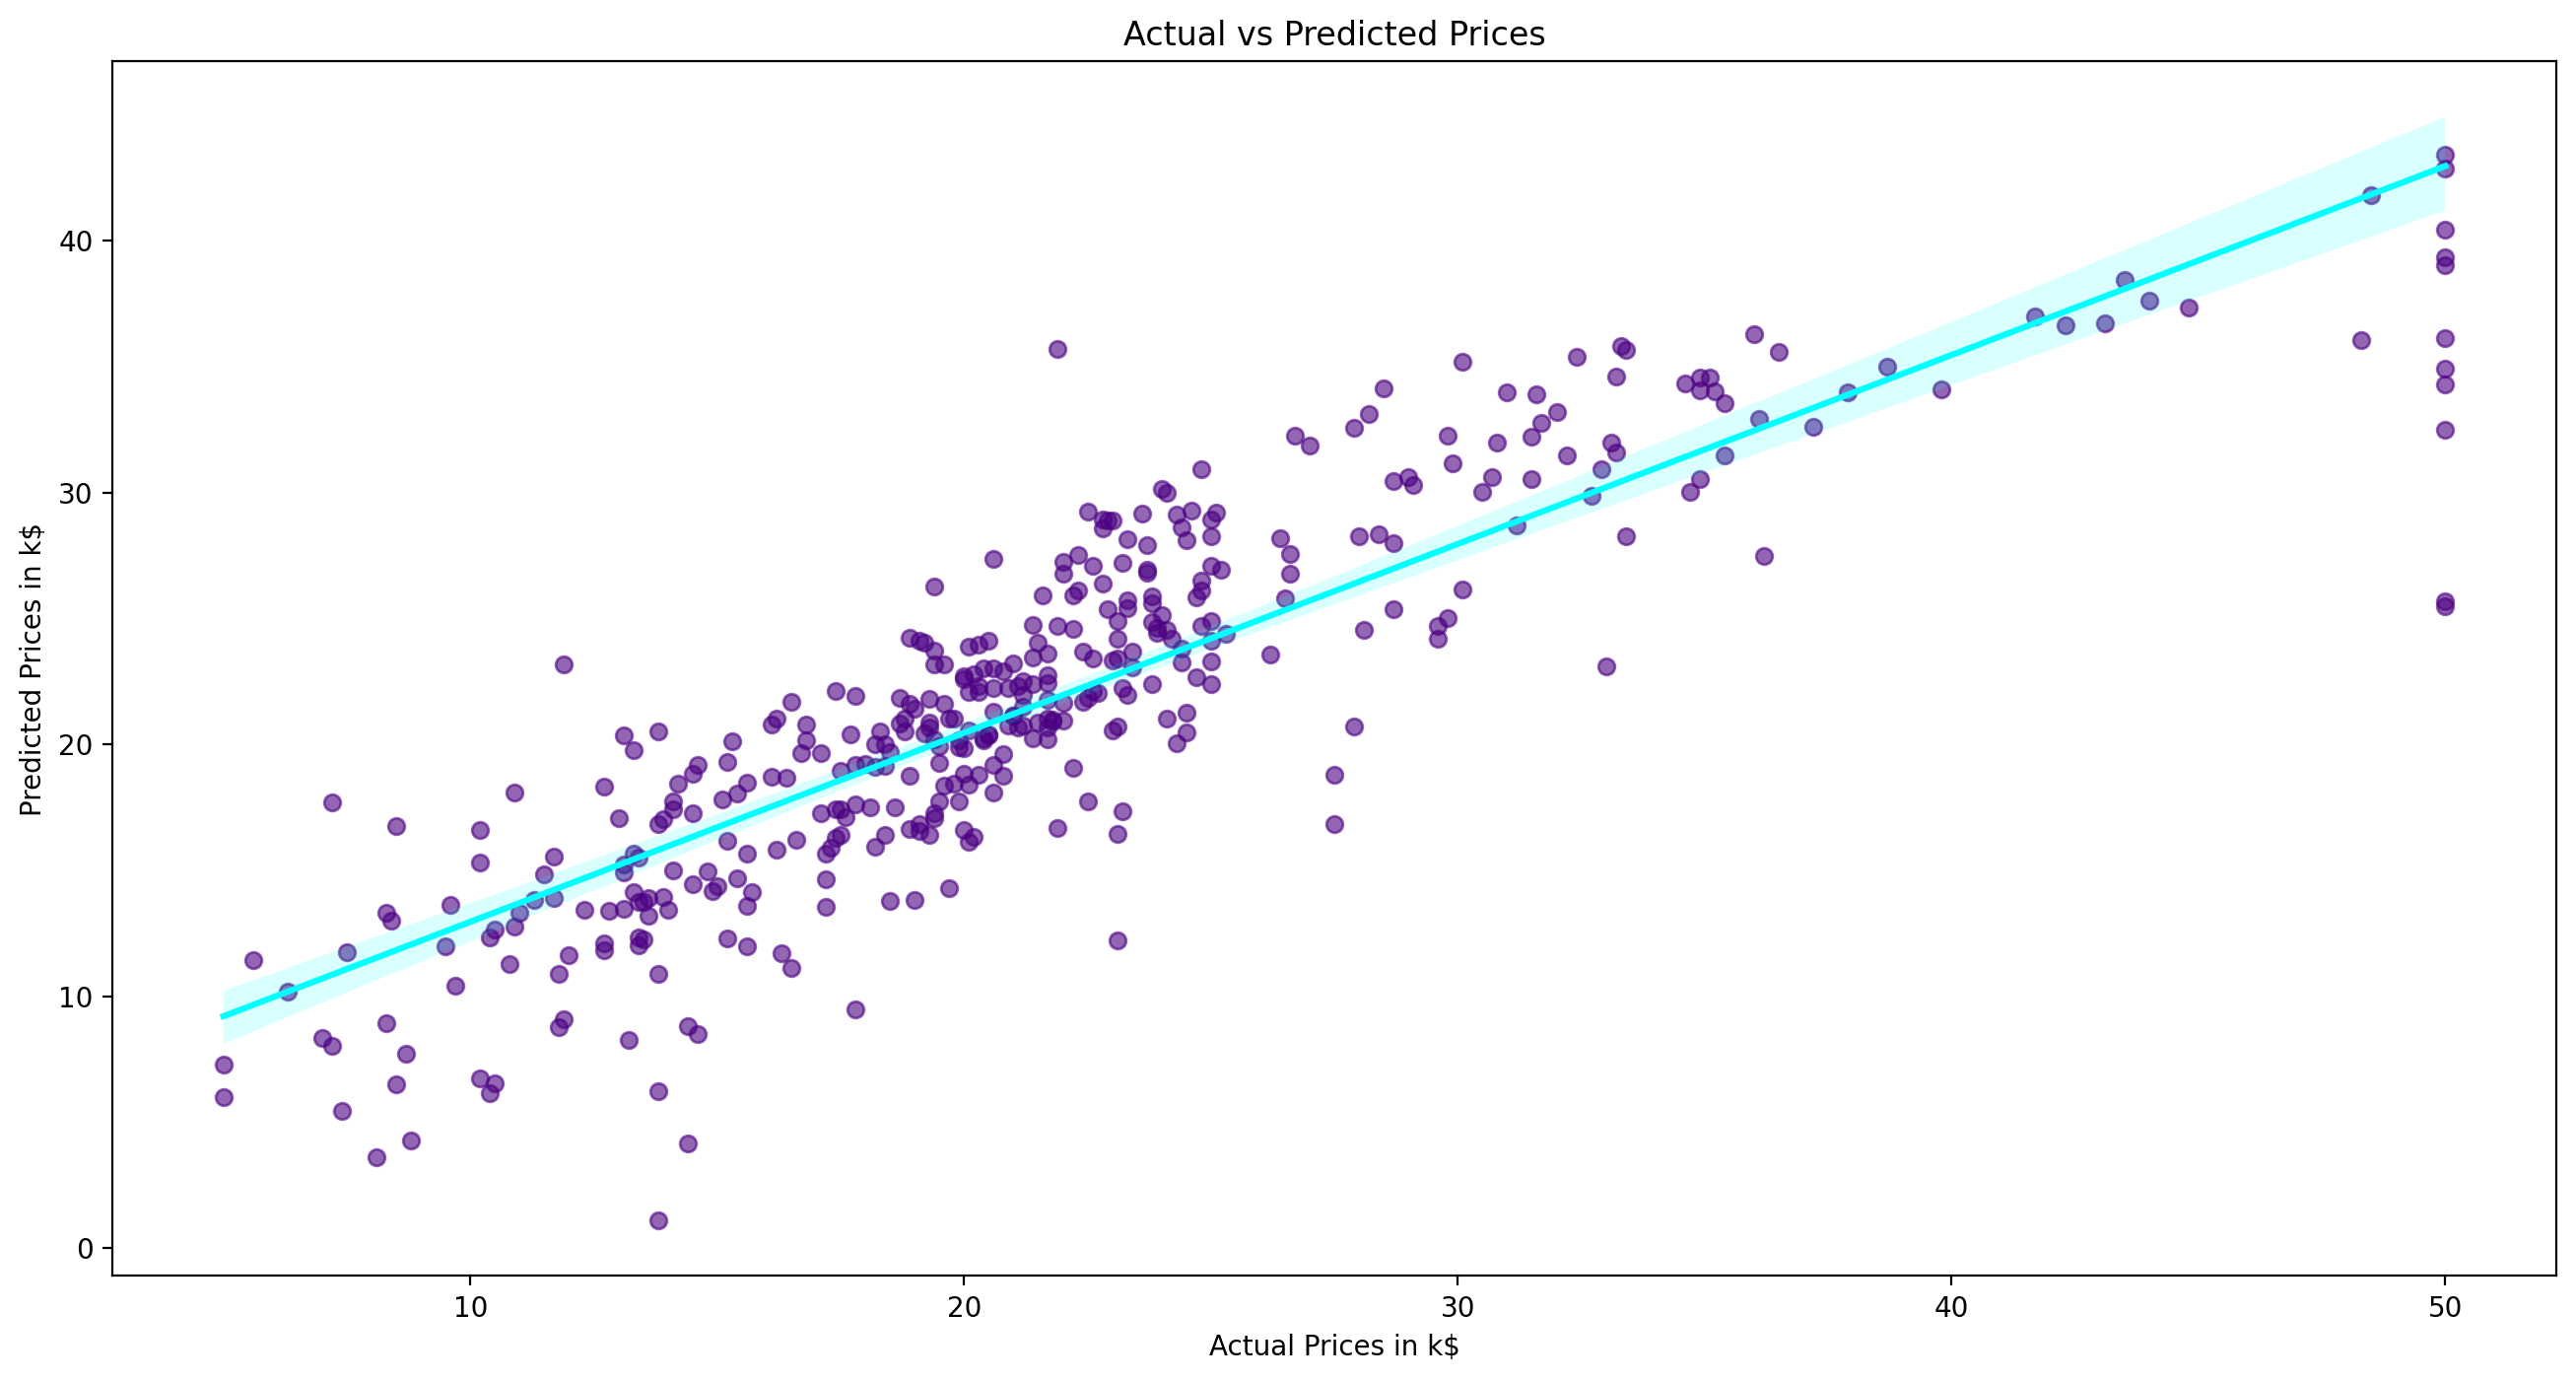

In [122]:
plt.figure(figsize=(16,8), dpi= 200)
reg_plot = sns.regplot(x= y_train,y= predicted_values,
            line_kws={'color': 'cyan'}, scatter_kws={'alpha': 0.6, 'color': 'indigo'})
reg_plot.set(title= 'Actual vs Predicted Prices', xlabel='Actual Prices in k$', ylabel = 'Predicted Prices in k$')

Looking around for ways to add label took me some time

In [123]:
residuals = (y_train - predicted_values)

Text(0, 0.5, 'Residual in k$')

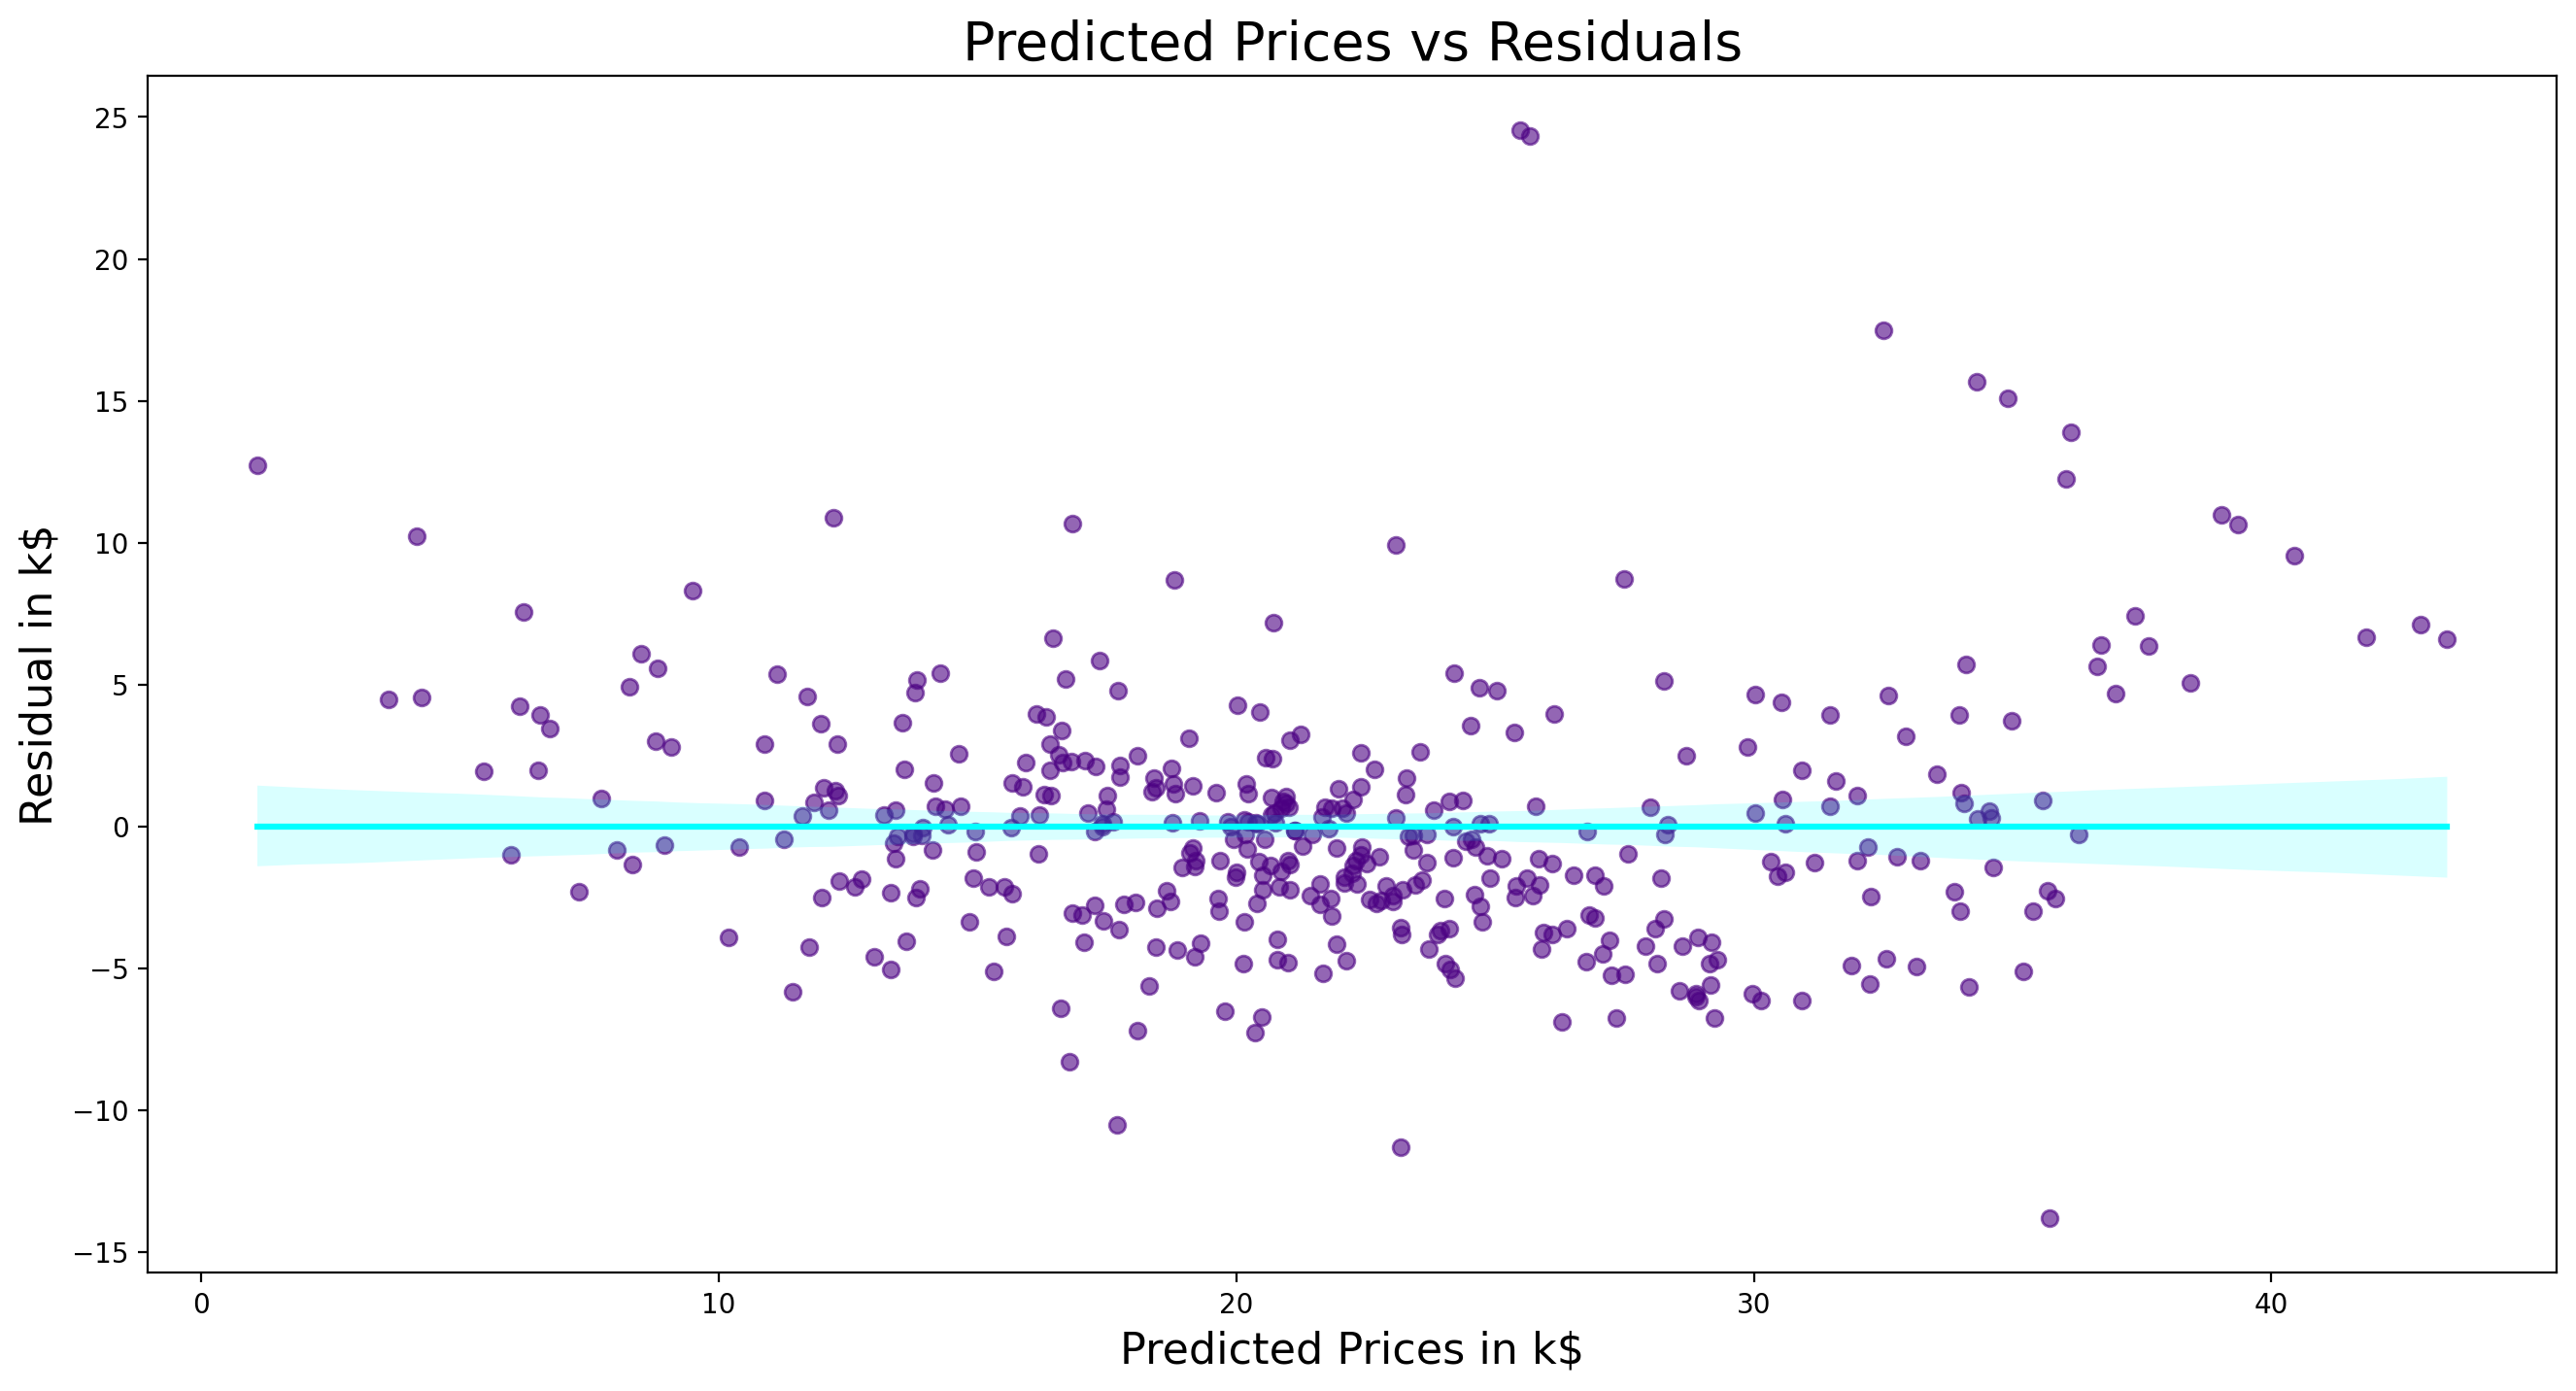

In [124]:
plt.figure(figsize=(16,8), dpi= 200)
reg_plot = sns.regplot(x= predicted_values ,y= residuals,
            line_kws={'color': 'cyan'}, scatter_kws={'alpha': 0.6, 'color': 'indigo'})
plt.title('Predicted Prices vs Residuals', fontsize=20)
reg_plot.set_xlabel('Predicted Prices in k$', fontsize= 16)
reg_plot.set_ylabel('Residual in k$', fontsize= 16)

Nice scatter for residuals, almost a straight line, meaning a best fit line isn't possible, and the error is random.

Course solution:
```
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()
```
So this is what she meant when she said in the same plot. I was just asked to show two plots one after another. And I had to pull the big guns (see below to get what I'm talking about)

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>

**Challenge**

* Calculate the mean and the skewness of the residuals.
* Again, use Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much?
* Is the mean different from zero?

In [125]:
print(f"Mean of residuals: {residuals.mean()}")
print(f"Skewness of residuals: {residuals.skew()}")

Mean of residuals: 6.9471381342881085e-16
Skewness of residuals: 1.4594428196679727


The mean appears to be nearly 0, which is a good sign. Now the skewness is a bit higher, so it is not exactly a normal distribution. Let's see its actual KDE

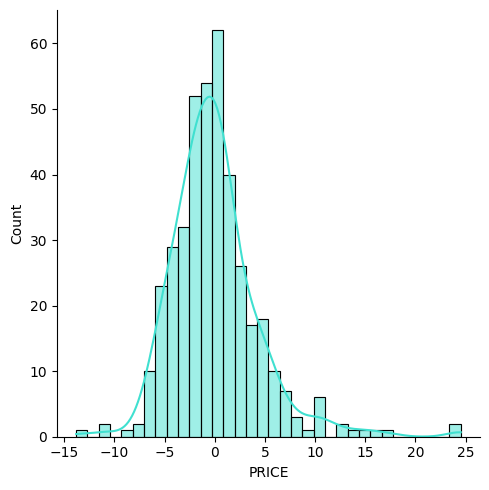

In [204]:
sns.displot(residuals, kde= True, color = '#40E0D0')

Course solution:
```
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()
```
Differences: Yet again I paid no heed to the title. Also the color was added later on my coloring spree.

As can be seen fromt the plot, the tail is longer towards the positive side, which means we have some skewness in the residuals.

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.

**Challenge**

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation.

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew.
* Which distribution has a skew that's closer to zero?


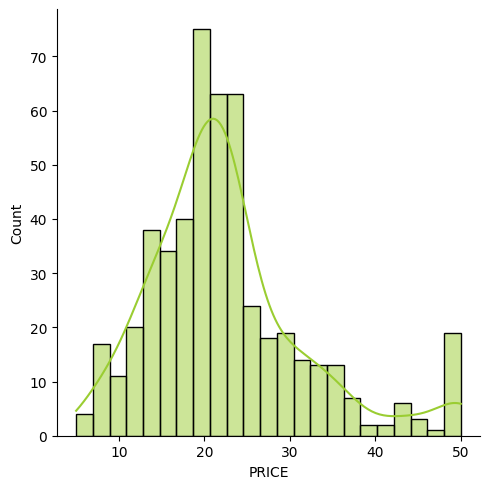

In [205]:
sns.displot(data.PRICE, kde= True, color = '#9ACD32')

In [127]:
print("The skew of prices is: ", data.PRICE.skew())
log_prices = np.log(data.PRICE)
log_prices[:5]

The skew of prices is:  1.1080984082549072


,PRICE
0,3.18
1,3.07
2,3.55
3,3.51
4,3.59


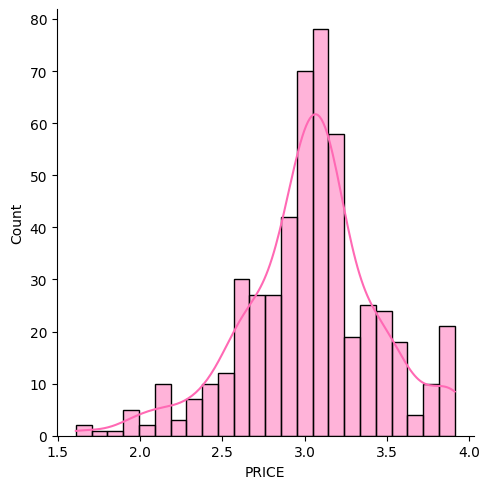

In [206]:
sns.displot(log_prices, kde= True, color = '#FF69B4')

In [ ]:
print("The skew of the log prices: ", log_prices.skew())

The skew of the log prices:  -0.33032129530987864


Now the data is left skewed instead of right, but spread less i.e. less absolute skew

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

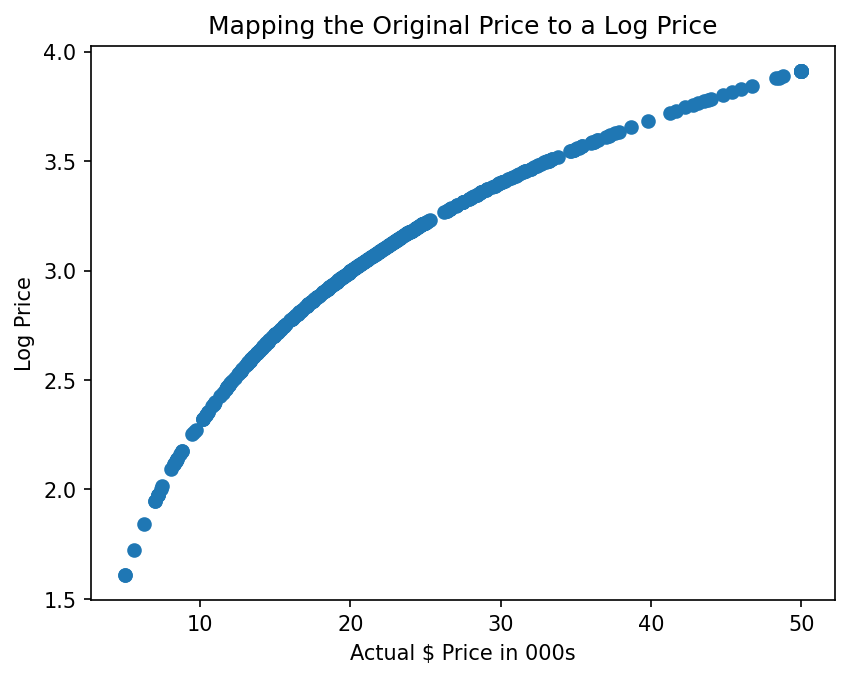

In [129]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

**Challenge**:

* Use `train_test_split()` with the same random state as before to make the results comparable.
* Run a second regression, but this time use the transformed target data.
* What is the r-squared of the regression on the training data?
* Have we improved the fit of our model compared to before based on this measure?


In [159]:
y_train_log, y_test_log = train_test_split(log_prices, test_size= 0.2, random_state= 10)
# We haven't tansformed anything in any other areas, so we just need target modifications
reg_log = LinearRegression().fit(X_train, y_train_log)

In [192]:
print("R-squared for regression on training data:", reg_log.score(X_train, y_train_log))

R-squared for regression on training data: 0.7930234826697584


Course solution:
```
new_target = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                    new_target,
                                                    test_size=0.2,
                                                    random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)

log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')
```
That's a lot of code to do the same thing. Is this even more readable than mine just because it separates everything to its own line?

0.75 to 0.79 is a change, though small. But it's a positive change regardless

## Evaluating Coefficients with Log Prices

**Challenge**: Print out the coefficients of the new regression model.

* Do the coefficients still have the expected sign?
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?

Hint: Use a DataFrame to make the output look pretty.

In [153]:
pd.DataFrame(np.concatenate((np.array([reg_log.intercept_]), reg_log.coef_)))

,0
0,4.06
1,-0.01
2,0.00
3,0.00
4,0.08
5,-0.70
6,0.07
7,0.00
8,-0.05
9,0.01


A lot of coefficients have changed this time. CRIM, INDUS, AGE,TAX, B have no statistical relation with price. ZN, CHAS, RM, DIS, RAD, PTRATIO, LSTAT have a small relation, while the major difference is made by NOX

Living near the river can increase prices a bit, more students per teacher means a small reduction in house prices

## Regression with Log Prices & Residual Plots

**Challenge**:

* Copy-paste the cell where you've created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values.
* Add 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side.
* Use `indigo` as the colour for the original regression and `navy` for the color using log prices.

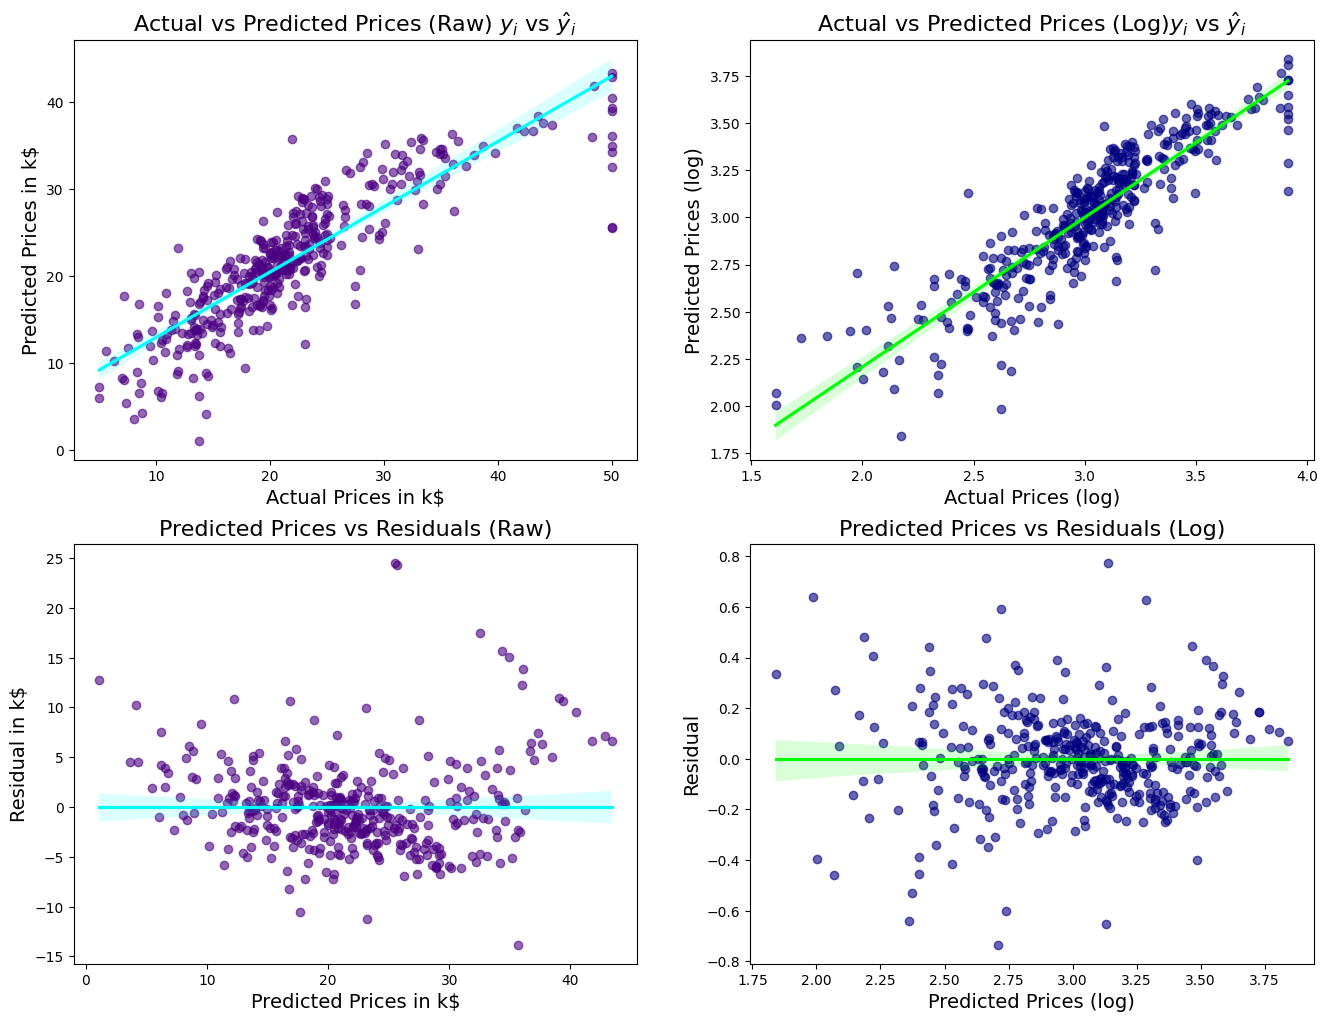

In [207]:
# Since the challenge says 2 more plots, it implies that we need all four plots inside a single plot. With some guidance from GPT, I decided to use subplots

predicted_values_log = reg_log.predict(X_train)
residuals_log = (y_train_log - predicted_values_log)
fig,axs = plt.subplots(2,2, figsize=(16,12))

sns.regplot(x= y_train,y= predicted_values, ax= axs[0,0],
            line_kws={'color': 'cyan'}, scatter_kws={'alpha': 0.6, 'color': 'indigo'})
axs[0,0].set_title('Actual vs Predicted Prices (Raw) $y _i$ vs $\hat y_i$', fontsize=16)
axs[0,0].set_xlabel('Actual Prices in k$', fontsize= 14)
axs[0,0].set_ylabel('Predicted Prices in k$', fontsize= 14)

sns.regplot(x= y_train_log,y= predicted_values_log, ax=axs[0,1],
            line_kws={'color': 'lime'}, scatter_kws={'alpha': 0.6, 'color': 'navy'})
axs[0,1].set_title('Actual vs Predicted Prices (Log)$y _i$ vs $\hat y_i$', fontsize=16)
axs[0,1].set_xlabel('Actual Prices (log)', fontsize= 14)
axs[0,1].set_ylabel('Predicted Prices (log)', fontsize= 14)

sns.regplot(x= predicted_values ,y= residuals, ax= axs[1,0],
            line_kws={'color': 'cyan'}, scatter_kws={'alpha': 0.6, 'color': 'indigo'})
axs[1,0].set_title('Predicted Prices vs Residuals (Raw)', fontsize=16)
axs[1,0].set_xlabel('Predicted Prices in k$', fontsize= 14)
axs[1,0].set_ylabel('Residual in k$', fontsize= 14)

sns.regplot(x= predicted_values_log ,y= residuals_log, ax= axs[1,1],
            line_kws={'color': 'lime'}, scatter_kws={'alpha': 0.6, 'color': 'navy'})
axs[1,1].set_title('Predicted Prices vs Residuals (Log)', fontsize=16)
axs[1,1].set_xlabel('Predicted Prices (log)', fontsize= 14)
axs[1,1].set_ylabel('Residual', fontsize= 14)

plt.show()

Yes, this is what I was talking about. her solution has it plotted 4 times, not in a single figure. But hey at least I now know more than what the course intended to teach, at least in this regard.
Also the y_hat I added after looking at the solution

Oh and I just realized I didn't use scatter and instead chose regplot, maybe because I saw the regression line, and regplot does it both

 **Challenge**:

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [193]:
print("Mean for log residual: ", residuals_log.mean())
print("Skew for log residual: ", residuals_log.skew())

Mean for log residual:  -4.7816536209103276e-17
Skew for log residual:  0.09299942594123424


Straight off the bat, this looks a lot more coser to 0. Let me plot it rq:

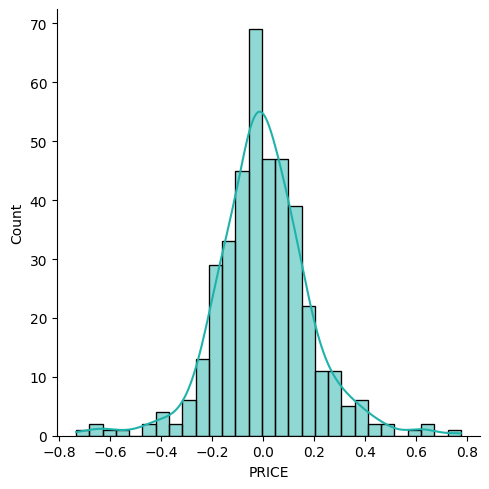

In [208]:
sns.displot(residuals_log, kde=True, color = '#20B2AA')

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

**Challenge**

Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [194]:
print("R-squared of the vanilla model: ", reg.score(X_test, y_test))
print("R-squared of the log model: ", reg_log.score(X_test, y_test_log))

R-squared of the vanilla model:  0.6709339839115642
R-squared of the log model:  0.7446922306260739


The R squared for the training set had seen only a jump from 0.75 to 0.79 but here the change is amazing, from -4 to 0.74. Is it because I did something wrong with the original model?

I probably had done something wrong, like not updating the initial regression model. Maybe it had the coefficients of the log model because it wasn't renamed yet. Anyway the differences now look believable, from 0.67 to 0.74, similar to the observed differences when it came to the training date.

I had to rename variable and run each code cell again and again because I kept reusing variable names, first for predicted prices and residuals, then for train and test sets. Finally now with another change to the regression model

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [162]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


**Challenge**

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value.

In [163]:
# Let's use both methods to make an estimate and compare them
raw_prediction = reg.predict(property_stats)
log_prediction = reg_log.predict(property_stats)

In [164]:
print("House price predicted by the raw model: ", raw_prediction)
print("House price predicted by the log model: ", np.exp(log_prediction))

House price predicted by the raw model:  [22.38376503]
House price predicted by the log model:  [20.70317832]


In [191]:
print("Actual average house price:", data['PRICE'].mean())

Actual average house price: 22.532806324110677


Looks like the raw model was closer to the actual thing here.

**Challenge**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [165]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [209]:
# Solution:
property_stats_new = property_stats.copy()
property_stats_new.loc[0, 'CHAS'] = np.float64(next_to_river)
property_stats_new.loc[0, 'RM'] = np.float64(nr_rooms)
property_stats_new.loc[0, 'PTRATIO'] = np.float64(students_per_classroom)
property_stats_new.loc[0, 'DIS'] = np.float64(distance_to_town)
property_stats_new.loc[0, 'NOX'] = np.float64(pollution)
property_stats_new.loc[0, 'LSTAT'] = np.float64(amount_of_poverty)
property_stats_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,1.00,0.62,8.00,68.57,5.00,9.55,408.24,20.00,356.67,6.95


Course solution:
```
# Solution
# Set Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty
```
A different approach, because I wasn't sure whether df['col'] would be a single value or a scalar here. Anyway I now know two approaches

Also I realized I had forgotten to change the value for DIS, and had a different result overall. Now the solution is identical, as it should be.

In [216]:
raw_prediction_new = reg.predict(property_stats_new)
log_prediction_new = reg_log.predict(property_stats_new)
print(f"House price predicted by the raw model: ${raw_prediction_new[0]*1000:.3f}")
print(f"House price predicted by the log model: ${np.exp(log_prediction_new)[0]*1000:.3f}")

House price predicted by the raw model: $28689.262
House price predicted by the log model: $25792.026


So this house should be priced at around 25.7k according to our log based model.
This is it I guess.